# Seaborn egzersizleri

Bu bölümde Seaborn modülü ile ilgili ogrendiklerimizi kullanarak archive.ics.uci.edu sitesinden elde ettigimiz bir veri setini inceliyecegiz:

https://archive.ics.uci.edu/ml/datasets/Student+Performance

Veri seti coktan mevcut klasör icinde mevcut, indirmenize gerek yok.

#### Numpy kütüphanesini np, Pandas kütüphanesini pd olarak ve Pandas kütüphanesinden DataFrame'i cagiralim. Ayni zamanda matplotlib.pyplot interface'ini plt olarak, Seaborn kütüphanesini sns olarak cagiralim. Matplotlib kütüphanesini backend'de gömelim.



In [41]:
import pandas as pd
import numpy as np
from pandas import DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

#### veri_okul.csv veri setini okutalim ve ilk ögelerine (head) göz atalim:. 
- NOT: Verileri yüklerken 'sep' yani ayirma parametresine dikkat edin. 

In [2]:

okul = pd.read_csv("veri_okul.csv",sep=";")

In [3]:
okul.head()

,lise,cinsiyet,yas,tek_cocuk,a_medeni,a_egitim,a_meslek,neden,g_g_suresi,d_c_suresi,bos_zaman,saglik,devamsizlik,vize,final
0,EAL,kiz,18,Hayir,Ayri,4,egitim,siralama,2,2,3,3,6,27.5,30.5
1,EAL,kiz,17,Hayir,Birlikte,1,diger,siralama,1,2,3,3,4,25.5,29.0
2,EAL,kiz,15,Evet,Birlikte,1,diger,diger,1,2,3,3,10,41.5,52.0
3,EAL,kiz,15,Hayir,Birlikte,2,hizmet,mesafe,1,3,2,5,2,71.5,74.5
4,EAL,kiz,16,Hayir,Birlikte,3,diger,mesafe,1,2,3,5,4,48.5,49.0


#### Veri tabani hakkinda genel bilgilere bakalim(Kac satir,sütun var?) (ipucu: info):

In [4]:
okul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 15 columns):
lise           395 non-null object
cinsiyet       395 non-null object
yas            395 non-null int64
tek_cocuk      395 non-null object
a_medeni       395 non-null object
a_egitim       395 non-null int64
a_meslek       395 non-null object
neden          395 non-null object
g_g_suresi     395 non-null int64
d_c_suresi     395 non-null int64
bos_zaman      395 non-null int64
saglik         395 non-null int64
devamsizlik    395 non-null int64
vize           395 non-null float64
final          395 non-null float64
dtypes: float64(2), int64(7), object(6)
memory usage: 46.4+ KB


#### Kac farkli lise var? Her lisede kac kisi var ve kiz-erkek dagilimlari nasil? Kiz-erkek ögrencilerin dagilimlari arasinda  büyük farklar var mi?  
- Not: countplot'u hatirla!

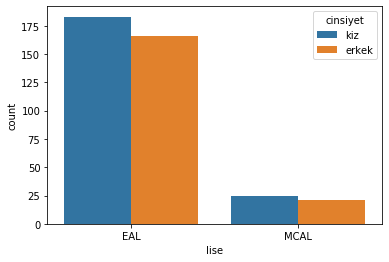

In [5]:
sns.countplot(x="lise", data=okul,hue="cinsiyet")

#### Ögrenciler hangi yas gruplarindadirlar? Yaslara göre ögrenci sayisinin dagilimi nasildir?

- Not: catplot kulaga nasil geliyor? 

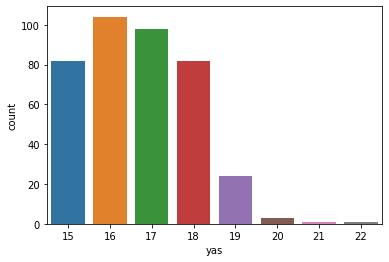

In [6]:
sns.countplot(x="yas",data=okul)

#### Okullara göre yas ortalamalari kactir? Bunlari bulalim.

- IPUCU: Barplot'u kullanabilir miyiz?

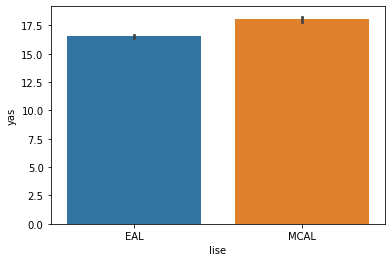

In [7]:
sns.barplot(x="lise",y="yas",data=okul)

#### Final sinav sonuclarinin ailenin egitim durumlarina göre degisimi nasildir? Ortalama, maximum ve minimum final puanlarini ailenin egitim durumuna göre degisimini nasil görebilirim?
- IPUCU: Kutu kutu pense!  boxplot :)

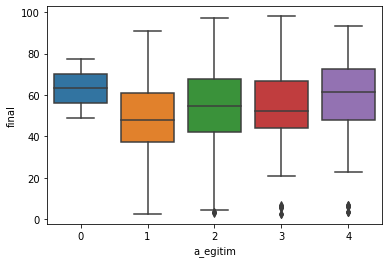

In [8]:
sns.boxplot(x="a_egitim",y="final",data = okul)

#### Ailenin meslek grubu egitim sektörü olan ögrencilerin final punlarinin cinsiyet göre dagilimlari nasildir? Hangi grup daha basarilidir?
- Not: Kemanciii! (violinplot)

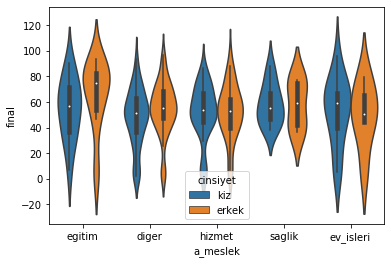

In [9]:
sns.violinplot(x="a_meslek",y="final",data = okul,hue="cinsiyet")

#### Ögrencilerin saglik durumu ile vize ve final sinav sonuclari arasinda bir iliski var midir? Bu konuda bir yorum yapabilir miyiz? 
- Not: swarmplot'u hatirliyor muyuz? hue yani 'göre' ifadesini kullanmak yerine birden fazla figür olusturalim (.subplots). 60 ve üzeri alan ögrenciler basarili sayilmaktadir.

(60, 100)

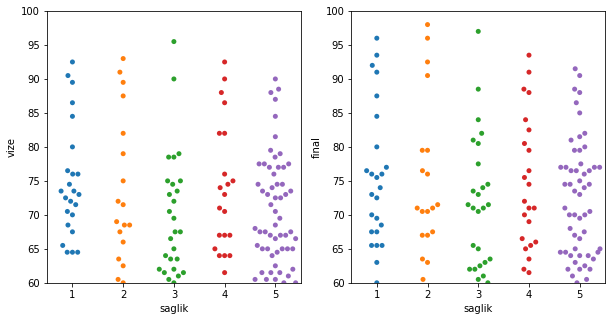

In [10]:
fig,axes =plt.subplots(1,2,figsize=(10,5)) #2 tane axes var 10,5 lik satir sütün 
f1 = sns.swarmplot(x="saglik",y="vize",data =okul,ax=axes[0])
f2 = sns.swarmplot(x="saglik",y="final",data =okul,ax=axes[1])
f1.set_ylim(60,100)
f2.set_ylim(60,100)

#### Okula gidis gelis vakitlerine göre devamsizlik nasil degismektedir? Ogrencilerin cogunlugu icin gelis gidis sureleri nasildir?

- Not: stripplot kullanalim :)

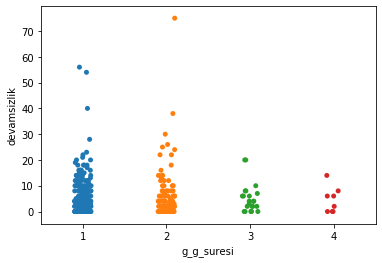

In [11]:
sns.stripplot(x="g_g_suresi",y="devamsizlik",data=okul)

#### Ogrencinin sinav sonucunun,  ailenin medeni durumuna ve ögrencinin tek cocuk olup olmamasina göre dagilimi nasildir? Aileler ayri oldugunda daha mi basarili sonuclar ortaya cikmistir? Bu konuda bir seyler soyleyebilir miyiz?

- ipucu: Facetgrid + distplot.. Kulaga nasil geliyor?

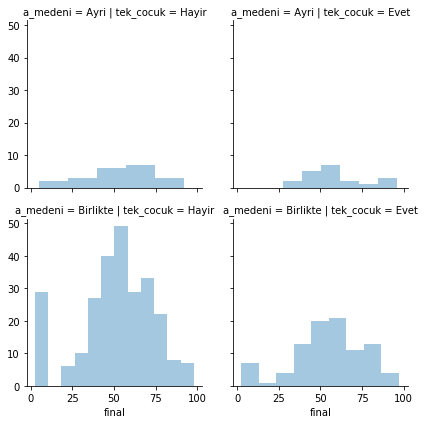

In [12]:
okul_facet = sns.FacetGrid(okul,row="a_medeni",col ="tek_cocuk") #satir ve sütün değerlerimiz 
okul_facet.map(sns.distplot,"final",kde=False) #kde bar histogram olması hali

#### Ders calisma suresi ile 'ortalama' final sinav sonucu ile bir baglanti var midir? Bu baginti ailenin medeni durumuna göre nasil bir degisiklik göstermektir? 

- Ipucu: bar'a mi gitsek bu gece?

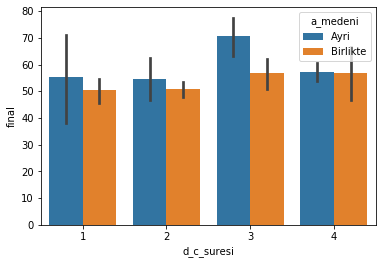

In [13]:
sns.barplot(x="d_c_suresi",y="final",data=okul,hue="a_medeni")

#### okul veri setimizin ilk 5 satirini yazdiralim (.head()).

In [14]:
okul.head()

,lise,cinsiyet,yas,tek_cocuk,a_medeni,a_egitim,a_meslek,neden,g_g_suresi,d_c_suresi,bos_zaman,saglik,devamsizlik,vize,final
0,EAL,kiz,18,Hayir,Ayri,4,egitim,siralama,2,2,3,3,6,27.5,30.5
1,EAL,kiz,17,Hayir,Birlikte,1,diger,siralama,1,2,3,3,4,25.5,29.0
2,EAL,kiz,15,Evet,Birlikte,1,diger,diger,1,2,3,3,10,41.5,52.0
3,EAL,kiz,15,Hayir,Birlikte,2,hizmet,mesafe,1,3,2,5,2,71.5,74.5
4,EAL,kiz,16,Hayir,Birlikte,3,diger,mesafe,1,2,3,5,4,48.5,49.0


#### Ögrencilerin okullari tercih etme sebeplerine göre en 'düsük' vize sonuclari hakkinda ne soyleyebiliriz? Tek cocuk olmanin nasil bir etkisi vardir?

- ipucu: Bu sefer catplot'u kullanalim. 'estimator' kismi sence ne olacak?

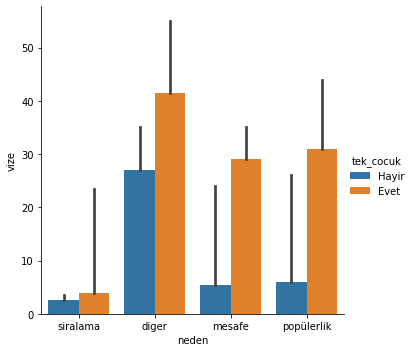

In [15]:
sns.catplot(x="neden",y="vize",data=okul,kind="bar",hue="tek_cocuk",estimator=np.min)

#### Kiz ve erkek ögrencilerin final notu dagilimlari nasildir? 

- Dagilim denilince aklimiza gelen ilk grafigi hatirlayalim: distplot.
- Displot'lar 'hue' özelligine sahip degillerdir. Bu durumda sadece final notunun dagilimini elde edebiliriz, yani cinsiyete göre dagilimlari bulamayiz. Peki ya cinsiyete göre dagilimi nasil bulabiliriz? 
    * Cevap: Mantiksal ögeleri kullanalim.
    
#### okul['final'] yerine sadece kizlari ya da erkekleri secmek istersek: 
-  okul['final'][okul['cinsiyet']=='erkek']
-  okul['final'][okul['cinsiyet']=='kiz']

#### NOT: Bu ve alttaki egzersiz digerlerine göre zorluk seviyesi olarak ileridedir.

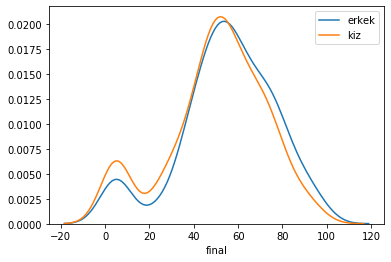

In [16]:
sns.distplot(okul["final"][okul["cinsiyet"]=="erkek"],label="erkek",hist=False)
sns.distplot(okul["final"][okul["cinsiyet"]=="kiz"],label="kiz",hist=False)

#### Yine ayni mantigi kullanarak, bu sefer bos zaman miktarinin vize sinav sonucuna etkisi nasildir? Bu konuda ne söyleyebiliriz? 

- Not: Üstteki egzersizde cinsiyet sütunu 2 farkli gruptan olustugu icin iki kere distplot'u kullandik. Peki ya 10 farkli özellik verilseydi? 10 kere distplot mu yazmaliyiz? Tabiki de hayir :). For loop'u bir düsünelim.  

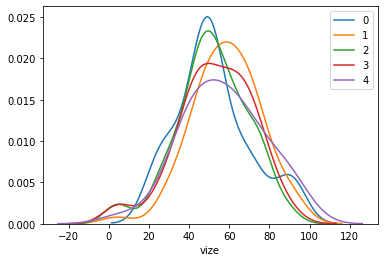

In [17]:
for x in range(okul["bos_zaman"].nunique()):
#for x in range(1,5): 
    bos =okul["bos_zaman"].unique()   
    bos.sort() #siralama islemi yapiyoruz
    sns.distplot(okul["vize"][okul["bos_zaman"] ==bos[x]],label=x,hist=False)

#### Final ve vize sinav sonuclari arasindaki iliskiyi jointplot kullanarak bulalim.

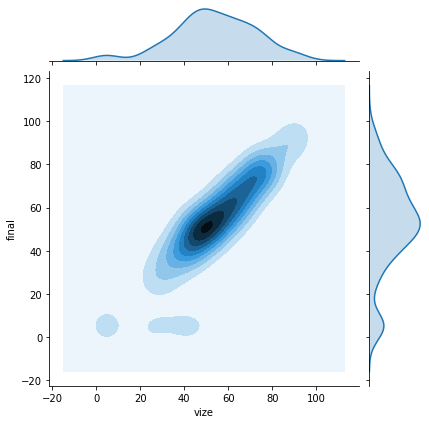

In [19]:
sns.jointplot(x="vize",y="final",data=okul,kind="kde")

#### Devamsizlik ve sinav sonuclari arasindaki iliski nasildir? Devamsizligi fazla olan ogrenciler daha mi basarililar?

- NOt: joinplot tipini hex yapsak bir de, nasil fikir? 

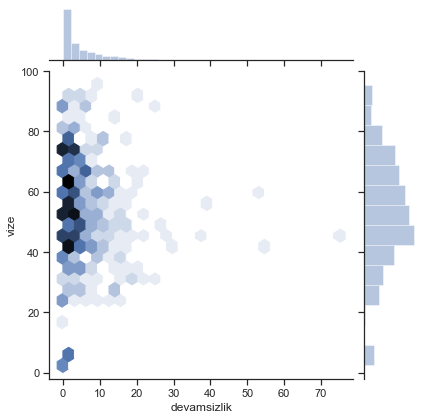

In [37]:
sns.jointplot(x="devamsizlik",y="vize",data=okul,kind="hex")

#### Final ve vize sonuclari arasinda bir tahmin grafigi olusturabilir miyiz?

- tahmin grafiklerini hatirlayalim.

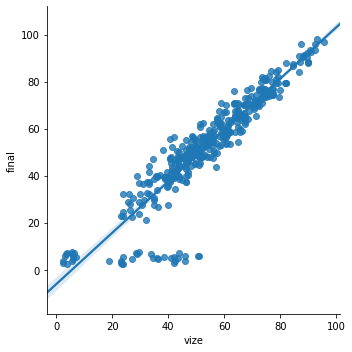

In [22]:
sns.lmplot(x="vize",y="final",data=okul)

#### Devamsizlik, vize ve final sinav sonuclari arasindaki iliskiyi bulabilir miyiz?

- Not: pairplot nasil fikir? 

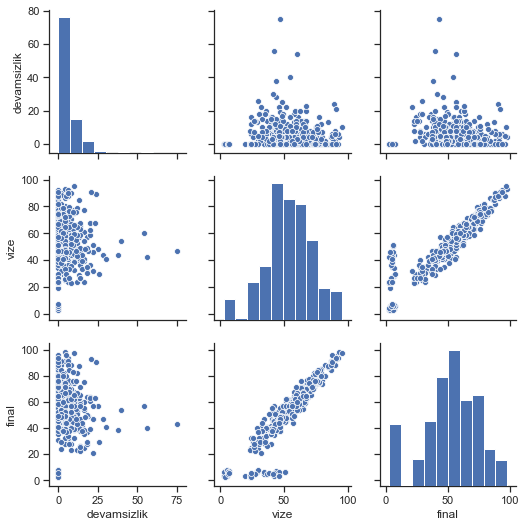

In [38]:
sns.pairplot(okul[["devamsizlik","vize","final"]])

#### Ogrencilerinin ailelerin meslekleri ve okulu secme sebepleri hakkinda ne söyleyebiliriz? Okuldaki ögrencilerin cogunlugu hangi nedenden dolayi okulu secmistir ve aileleri hangi meslek grubuna dahildir?

- Not: clustermap'i kullanalim. Ama heatmap matriks halinde olan dataframe'ler ile calisir. O yüzden verimizden alistirmada istenen iki sütunu alacak sekilde matriks halinde olan  yeni bir dataframe olusturalim. (ipucu:crosstab)  

In [65]:
df = pd.crosstab(index=okul["a_meslek"],columns=okul["neden"])
df #dataframe olusturdum burada bunları siniflandirdim asagida 

neden,diger,mesafe,popülerlik,siralama
a_meslek,,,,
diger,13,62,60,82
egitim,5,7,6,11
ev_isleri,1,7,4,8
hizmet,14,30,26,41
saglik,3,3,9,3


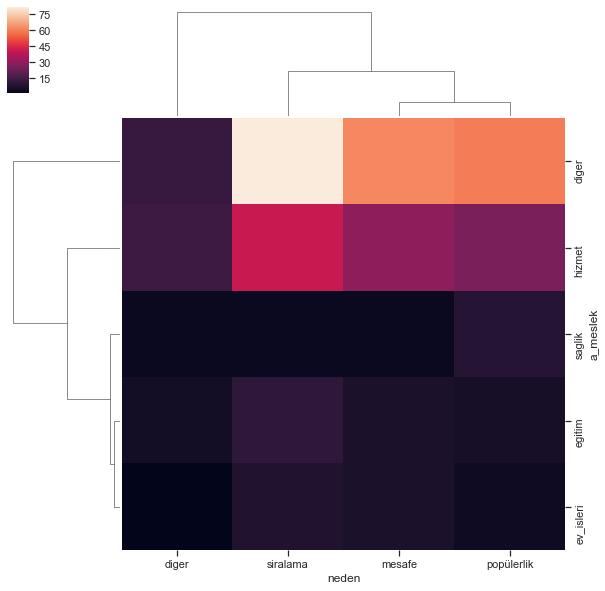

In [66]:
sns.clustermap(data=df)